# Importing Basic Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

# Importing Scikit-learn Packages

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Importing Keras Packages

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Part A

## Importing Data

In [150]:
concrete_data = pd.read_csv('concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Split imported data in 'Predictors' and 'Target'

In [151]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

n_cols = predictors.shape[1]

## Defining Neural Network Regression Model with 1 hidden layer

In [152]:
def regression_model():
    # Create model
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (n_cols, )))
    model.add(Dense(1))
    
    # Compile model
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

## Model Iteration - (without Data Normalization; 1 hidden layer; epochs = 50)

In [164]:
for i in range (1, 51):
    
    # Split the data into Train and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3)

    # Build the model
    model = regression_model()

    # Fit the model
    model.fit(X_train, y_train, epochs = 50, verbose = 0)
    
    # Predict using model
    predictions = model.predict(X_test)
    
    # Mean Squared Error between the predicted concrete strength and the actual concrete strength
    temp = mean_squared_error(y_test, predictions)
    
    if i == 1:
        mean_squared_error_part_a = []
        mean_squared_error_part_a.append(temp)
    else:
        mean_squared_error_part_a.append(temp)
        
    if i == 1:
        print('ITERATION: ', i, end = '')
    else:
        print(' ', i, end = '')

ITERATION:  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50

## Creating 'Mean Squared Error' Dataframe - Post Model Iteration

In [179]:
data_part_a = {'Statistics':['Mean', 'Standard_Deviation'], \
               'MSE_Part_A':[statistics.mean(mean_squared_error_part_a), statistics.stdev(mean_squared_error_part_a)]}
mean_squared_error_all_parts = pd.DataFrame(data_part_a)
mean_squared_error_all_parts.set_index('Statistics', inplace = True)
mean_squared_error_all_parts

,MSE_Part_A
Statistics,
Mean,355.667165
Standard_Deviation,381.775850


## Visualizing 'Mean Squared Error' distribution without Data Normalization

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca95196a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca951a2198>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca951966d8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca951a2828>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca951a2b70>],
 'means': []}

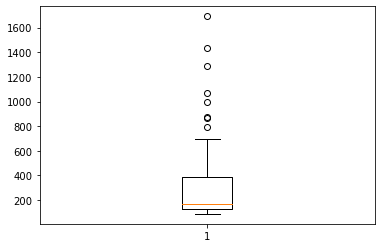

In [220]:
plt.boxplot(mean_squared_error_part_a)

# Part B

## Normalizing Data

In [192]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


## Model Iteration - (with Data Normalization; 1 hidden layer; epochs = 50)

In [181]:
for i in range (1, 51):
    
    # Split the data into Train and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size = 0.3)

    # Build the model
    model = regression_model()

    # Fit the model
    model.fit(X_train, y_train, epochs = 50, verbose = 0)
    
    # Predict using model
    predictions = model.predict(X_test)
    
    # Mean Squared Error between the predicted concrete strength and the actual concrete strength
    temp = mean_squared_error(y_test, predictions)
    
    if i == 1:
        mean_squared_error_part_b = []
        mean_squared_error_part_b.append(temp)
    else:
        mean_squared_error_part_b.append(temp)
        
    if i == 1:
        print('ITERATION: ', i, end = '')
    else:
        print(' ', i, end = '')

ITERATION:  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50

## Creating 'MSE' DF and Comparing to earlier MSE DF Without Normalization

In [207]:
data_part_b = {'Statistics':['Mean', 'Standard_Deviation'], \
               'MSE_Part_A':[statistics.mean(mean_squared_error_part_a), statistics.stdev(mean_squared_error_part_a)], \
               'MSE_Part_B':[statistics.mean(mean_squared_error_part_b), statistics.stdev(mean_squared_error_part_b)]}
mean_squared_error_all_parts = pd.DataFrame(data_part_b)
mean_squared_error_all_parts.set_index('Statistics', inplace = True)
print('\033[1m My Comment ::::: \033[1m \n')
print('While the *Mean* of the *Mean Squared Errors* improved slighly due to *Normalized Data*, the *Standard Deviation* \
improved significanly which shows that the distribution of squared errors is now more concentrated towards the Mean with lower \
number of cases having very high squared errors errors, which shows a definite improvement. \n')
mean_squared_error_all_parts

 My Comment :::::  

While the *Mean* of the *Mean Squared Errors* improved slighly due to *Normalized Data*, the *Standard Deviation* improved significanly which shows that the distribution of squared errors is now more concentrated towards the Mean with lower number of cases having very high squared errors errors, which shows a definite improvement. 



,MSE_Part_A,MSE_Part_B
Statistics,,
Mean,355.667165,348.952034
Standard_Deviation,381.775850,78.739366


## Visualizing 'MSE' DF distribution with Data Normalization

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca950b1c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca9503f390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca950b1b00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca9503fa20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca9503fd68>],
 'means': []}

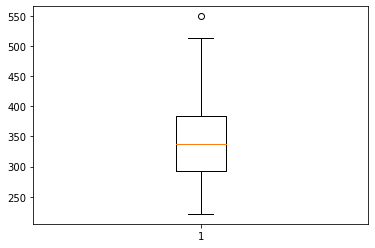

In [223]:
plt.boxplot(mean_squared_error_part_b)

# Part C

## Model Interation - (with Data Normalization; 1 hidden layer; epochs = 100)

In [184]:
for i in range (1, 51):
    
    # Split the data into Train and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size = 0.3)

    # Build the model
    model = regression_model()

    # Fit the model
    model.fit(X_train, y_train, epochs = 100, verbose = 0)
    
    # Predict using model
    predictions = model.predict(X_test)
    
    # Mean Squared Error between the predicted concrete strength and the actual concrete strength
    temp = mean_squared_error(y_test, predictions)
    
    if i == 1:
        mean_squared_error_part_c = []
        mean_squared_error_part_c.append(temp)
    else:
        mean_squared_error_part_c.append(temp)
        
    if i == 1:
        print('ITERATION: ', i, end = '')
    else:
        print(' ', i, end = '')

ITERATION:  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50

## Creating 'MSE' DF and Comparing to earlier MSE DF (data norm. & epochs = 50)

In [208]:
# Creating 'Mean Squared Error' Dataframe

data_part_c = {'Statistics':['Mean', 'Standard_Deviation'], \
               'MSE_Part_A':[statistics.mean(mean_squared_error_part_a), statistics.stdev(mean_squared_error_part_a)], \
               'MSE_Part_B':[statistics.mean(mean_squared_error_part_b), statistics.stdev(mean_squared_error_part_b)], \
               'MSE_Part_C':[statistics.mean(mean_squared_error_part_c), statistics.stdev(mean_squared_error_part_c)]}
mean_squared_error_all_parts = pd.DataFrame(data_part_c)
mean_squared_error_all_parts.set_index('Statistics', inplace = True)
print('\033[1m My Comment ::::: \033[1m \n')
print('Both the *Mean* as well as the *Standard Deviation* of the *Mean Squared Errors* improved significantly further from *Part B* (i.e. normalized data). \
This means that not only the average error decreased significantly which is shown by mean, the distribution of error is also now much more concentrated \
towards the mean which means futher lower number of cases having significanly high squared errors above the mean. \n')
mean_squared_error_all_parts

 My Comment :::::  

Both the *Mean* as well as the *Standard Deviation* of the *Mean Squared Errors* improved significantly further from *Part B* (i.e. normalized data). This means that not only the average error decreased significantly which is shown by mean, the distribution of error is also now much more concentrated towards the mean which means futher lower number of cases having significanly high squared errors above the mean. 



,MSE_Part_A,MSE_Part_B,MSE_Part_C
Statistics,,,
Mean,355.667165,348.952034,163.262230
Standard_Deviation,381.775850,78.739366,17.187308


## Visualizing 'MSE' DF distribution with Data Normalization and Higher Epochs

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca9500fc88>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca9501e3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca9500fb38>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca9501ea58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca9501eda0>],
 'means': []}

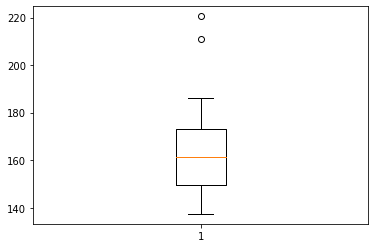

In [224]:
plt.boxplot(mean_squared_error_part_c)

# Part D

## Defining Neural Network Regression Model with 3 hidden layers

In [187]:
def regression_model_new():
    # Create model
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (n_cols, )))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    # Compile model
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

## Model Iteration - (with Data Normalization; 3 hidden layers; epochs = 50)

In [188]:
for i in range (1, 51):
    
    # Split the data into Train and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size = 0.3)

    # Build the model
    model = regression_model_new()

    # Fit the model
    model.fit(X_train, y_train, epochs = 50, verbose = 0)
    
    # Predict using model
    predictions = model.predict(X_test)
    
    # Mean Squared Error between the predicted concrete strength and the actual concrete strength
    temp = mean_squared_error(y_test, predictions)
    
    if i == 1:
        mean_squared_error_part_d = []
        mean_squared_error_part_d.append(temp)
    else:
        mean_squared_error_part_d.append(temp)
        
    if i == 1:
        print('ITERATION: ', i, end = '')
    else:
        print(' ', i, end = '')

ITERATION:  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50

## Creating 'MSE' DF and Comparing to MSE DF (data norm. & hidden layers = 1)

In [212]:
# Creating 'Mean Squared Error' Dataframe

data_part_d = {'Statistics':['Mean', 'Standard_Deviation'], \
               'MSE_Part_A':[statistics.mean(mean_squared_error_part_a), statistics.stdev(mean_squared_error_part_a)], \
               'MSE_Part_B':[statistics.mean(mean_squared_error_part_b), statistics.stdev(mean_squared_error_part_b)], \
               'MSE_Part_C':[statistics.mean(mean_squared_error_part_c), statistics.stdev(mean_squared_error_part_c)], \
               'MSE_Part_D':[statistics.mean(mean_squared_error_part_d), statistics.stdev(mean_squared_error_part_d)]}
mean_squared_error_all_parts = pd.DataFrame(data_part_d)
mean_squared_error_all_parts.set_index('Statistics', inplace = True)
print('\033[1m My Comment ::::: \033[1m \n')
print('Again, both the *Mean* as well as the *Standard Deviation* of the *Mean Squared Errors* improved significantly further from *Part B* (i.e. normalized data). \
Also, the key thing to note here is that the improvement in both the *Mean* as well as *Standard Deviation* with **More No. of Hidden Layers** is significantly \
more than the improvement with **More Epochs**. This shows that we can improve the outcome of our model significanly more with *More Hidden Layers* \
than with *More Epochs*. \n')
mean_squared_error_all_parts

 My Comment :::::  

Again, both the *Mean* as well as the *Standard Deviation* of the *Mean Squared Errors* improved significantly further from *Part B* (i.e. normalized data). Also, the key thing to note here is that the improvement in both the *Mean* as well as *Standard Deviation* with **More No. of Hidden Layers** is significantly more than the improvement with **More Epochs**. This shows that we can improve the outcome of our model significanly more with *More Hidden Layers* than with *More Epochs*. 



,MSE_Part_A,MSE_Part_B,MSE_Part_C,MSE_Part_D
Statistics,,,,
Mean,355.667165,348.952034,163.262230,130.695725
Standard_Deviation,381.775850,78.739366,17.187308,13.592974


## Visualizing 'MSE' DF distribution with Data Norm. and Higher no. of hidden layers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca94ff5240>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca94ff5940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca94fe8ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca94ff5fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca94f7d358>],
 'means': []}

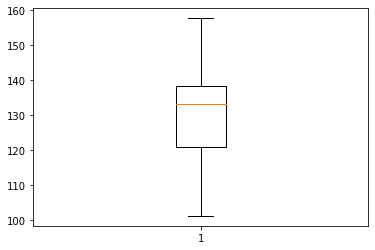

In [225]:
plt.boxplot(mean_squared_error_part_d)

# Final Finding

**1. Normalization helps in improving both mean and standard deviation of error. Also, with data normalization, SD improves significantly showing the distribution of error is more concentrated and the result is more reliable.**

**2. We can improve the outcome of our model more significanly with *More Hidden Layers* than with *More Epochs***